<a href="https://colab.research.google.com/github/smperez1997/PRY_MachineLearning/blob/main/Quien_Macias_Perez_Sambachi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
# importar datos
quien_es_quien = pd.read_csv('quienesquien.csv')


In [4]:
# analizar datos
quien_es_quien.info

<bound method DataFrame.info of     No.  Personaje  ... Su nombre tiene la letra o Nariz grande?
0     1  Alejandro  ...                         SI            NO
1     2    Alfredo  ...                         SI            NO
2     3        Ana  ...                         NO            SI
3     4      Anita  ...                         NO            NO
4     5   Bernardo  ...                         SI            SI
5     6     Carlos  ...                         SI            NO
6     7      Clara  ...                         NO            NO
7     8      David  ...                         NO            NO
8     9    Ernesto  ...                         SI            NO
9    10     Felipe  ...                         NO            NO
10   11     Germán  ...                         NO            SI
11   12  Guillermo  ...                         SI            NO
12   13      Jorge  ...                         SI            NO
13   14     Manuel  ...                         NO        

In [5]:
quien_es_quien.shape

(26, 20)

In [7]:
#Conviertir a mayúsculas la columna que no tiene sus datos en mayúsculas
quien_es_quien['Se parece a Altamira?'] = quien_es_quien['Se parece a Altamira?'].str.upper()

In [8]:
#Actualizar el uso de SI = sin tilde
quien_es_quien = quien_es_quien.replace('SÍ','SI')

In [9]:
#Conviertir SI= 1 y NO= 0
quien_es_quien = quien_es_quien.replace('SI',1)
quien_es_quien = quien_es_quien.replace('NO',0)

In [10]:
quien_es_quien.head()

,No.,Personaje,Sexo,Vello Facial,Anteojos,Sombrero,Aros?,Tiene Rubor?,Barba?,Es pelado?,Es rubio?,Es canoso?,Su inicial está antes que la H en el alfabeto?,Se parece a Altamira?,Tiene boca pequeña,Sonrie,Tiene Ojos Celestes,Nombre con Mas de 5 letras,Su nombre tiene la letra o,Nariz grande?
0,1,Alejandro,Hombre,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
1,2,Alfredo,Hombre,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0
2,3,Ana,Mujer,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,4,Anita,Mujer,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0
4,5,Bernardo,Hombre,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1


In [11]:
#Dividir el df original en 2: un array con el sexo y otro que agrupa las respuestas
respuestas = quien_es_quien.iloc[0:24,3:20]
sexo_muestras = quien_es_quien.iloc[0:24,2:3]


In [12]:
respuestas 

,Vello Facial,Anteojos,Sombrero,Aros?,Tiene Rubor?,Barba?,Es pelado?,Es rubio?,Es canoso?,Su inicial está antes que la H en el alfabeto?,Se parece a Altamira?,Tiene boca pequeña,Sonrie,Tiene Ojos Celestes,Nombre con Mas de 5 letras,Su nombre tiene la letra o,Nariz grande?
0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0
2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1
5,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0
6,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0
7,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0
8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0
9,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0


In [13]:
sexo_muestras

,Sexo
0,Hombre
1,Hombre
2,Mujer
3,Mujer
4,Hombre
5,Hombre
6,Mujer
7,Hombre
8,Hombre
9,Hombre


In [14]:
X = respuestas.to_numpy()
Y = sexo_muestras.to_numpy()

In [17]:
#Valores de prueba para calcular el sexo
test_respuestas = quien_es_quien.iloc[24:26, 3:20].to_numpy()   

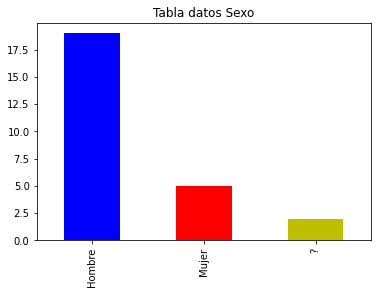

In [18]:
# predicción datos faltantes
quien_es_quien.Sexo.value_counts().plot(kind = 'bar', color = ['b', 'r', 'y'])
plt.title('Tabla datos Sexo')
plt.show()

In [20]:
#DecisionTreeClassifier
dtc_clf = tree.DecisionTreeClassifier()
dtc_clf = dtc_clf.fit(X,Y)
dtc_prediction = dtc_clf.predict(test_respuestas)
print ("Predicción por Árbol de decisión: ")
print (dtc_prediction)



Predicción por Árbol de decisión: 
['Hombre' 'Hombre']


In [21]:
# Score predicción por Árbol de decisión  
sad = round(dtc_clf.score(X, Y), 4)
print('Exactitud: %0.4f' % (sad))

Exactitud: 1.0000


In [22]:
#RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X,Y)
rfc_prediction = rfc_clf.predict(test_respuestas)
print ("Predicción por Random Forest: ")
print (rfc_prediction)



Predicción por Random Forest: 
['Hombre' 'Hombre']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
# Score predicción por Random Forest  
sp = round(rfc_clf.score(X, Y), 4)
print('Exactitud: %0.4f' % (sp))

Exactitud: 1.0000


In [24]:
#Support Vector Classifier
s_clf = SVC()
s_clf.fit(X,Y)
s_prediction = s_clf.predict(test_respuestas)
print ("Predicción por Clasificación de Vectores: ")
print (s_prediction)


Predicción por Clasificación de Vectores: 
['Hombre' 'Hombre']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
s_prediction

array(['Hombre', 'Hombre'], dtype=object)

In [25]:
# Score predicción por Clasificación de Vectores
score_pred = round(s_clf.score(X, Y), 4)
print('Exactitud: %0.4f' % (score_pred))

Exactitud: 0.9167


In [ ]:
#LogisticRegression
l_clf = LogisticRegression()
l_clf.fit(X,Y)
l_prediction = l_clf.predict(test_respuestas)
print("Predicción por Regresión Lineales: ")
print(l_prediction)


Predicción por Regresión Lineales: 
['Hombre' 'Hombre']


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Score predicción por Regresión Lineal
score_prediccion = round(l_clf.score(X, Y), 4)
print('Exactitud: %0.4f' % (score_prediccion))

Exactitud: 0.9167
